# **IP: EXpt 8 - Image Compression Using DCT Transform.**

Name: Nabila Tajrin Bristy

## **STEP 1: MOUNT GOOGLE DRIVE**

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


## **STEP 2: LOAD IMAGE AND VERIFY PATH**

In [2]:
import cv2
import numpy as np

# Verify the image path
image_path = '/content/drive/My Drive/Colab Notebooks/dataset/lena.jpg'  # Update with your image path

# Load the image in grayscale
img = cv2.imread(image_path, 0)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Could not load image from {image_path}. Please verify the path.")
else:
    print("Image loaded successfully!")


Image loaded successfully!


## **STEP 3: PART A - FULL IMAGE DCT AND RECONSTRUCTION**

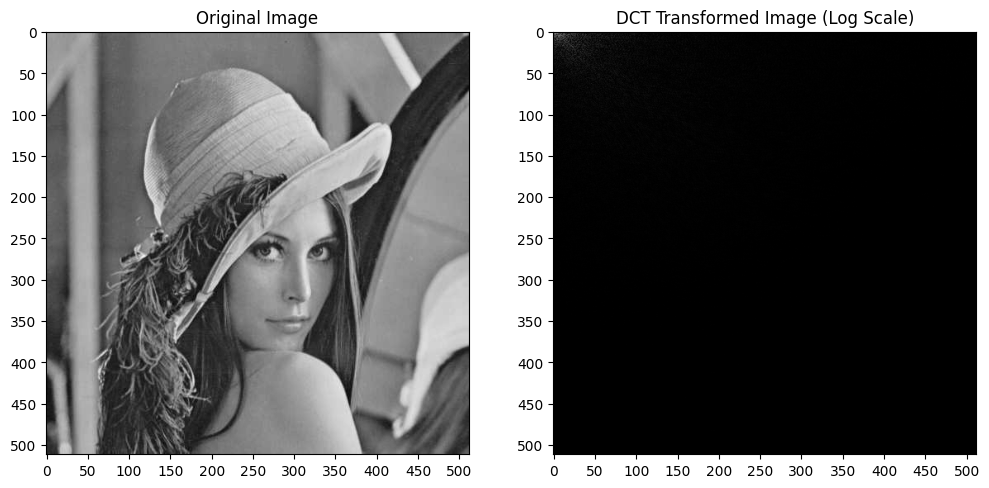

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Convert image to float32 and scale to [0, 1]
imf = np.float32(img) / 255.0

# Compute the DCT
dctim = cv2.dct(imf)

# Visualize DCT using a logarithmic transformation for better contrast
dct_visual = np.log(1 + np.abs(dctim))

# Display the original and DCT-transformed images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis('on')  # Turn on the axis
plt.xticks(np.arange(0, img.shape[1], 50))  # Set x-axis ticks every 50 pixels
plt.yticks(np.arange(0, img.shape[0], 50))  # Set y-axis ticks every 50 pixels

# DCT Transformed Image (with log scaling for better visualization)
plt.subplot(122)
plt.imshow(dct_visual, cmap="gray")
plt.title("DCT Transformed Image (Log Scale)")
plt.axis('on')  # Turn on the axis
plt.xticks(np.arange(0, dct_visual.shape[1], 50))  # Set x-axis ticks every 50 pixels
plt.yticks(np.arange(0, dct_visual.shape[0], 50))  # Set y-axis ticks every 50 pixels

plt.show()


## **STEP 4: PERFORM INVERSE DCT AND RECONSTRUCT THE IMAGE**

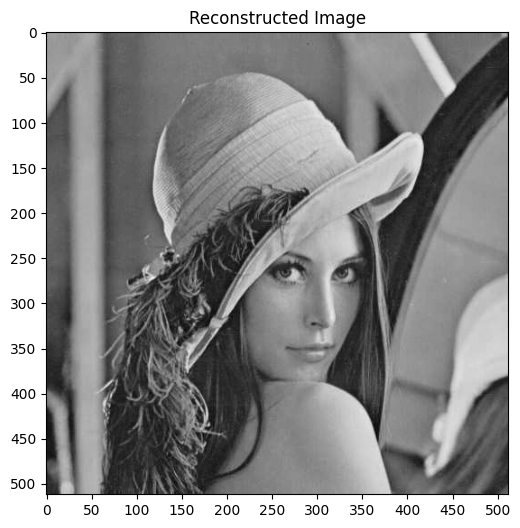

In [11]:
# Perform Inverse DCT to reconstruct the image
rec_img = cv2.idct(dctim)
rec_img1 = 255 * rec_img  # Scale back to [0, 255]
rec_img2 = np.uint8(np.clip(rec_img1, 0, 255))  # Clip and convert to uint8

# Display the reconstructed image with axis measurements
plt.figure(figsize=(6, 6))
plt.imshow(rec_img2, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('on')  # Turn on the axis
plt.xticks(np.arange(0, rec_img2.shape[1], 50))  # Set x-axis ticks every 50 pixels
plt.yticks(np.arange(0, rec_img2.shape[0], 50))  # Set y-axis ticks every 50 pixels
plt.show()


## **STEP 5: CALCULATE MEAN SQUARED ERROR (MSE)**

In [5]:
# Compute the error image
error = img - rec_img2

# Calculate Squared Error (SE) and Mean Squared Error (MSE)
SE = error ** 2
MSE = np.sum(SE) / (img.shape[0] * img.shape[1])

print(f"MSE (Mean Squared Error): {MSE}")


MSE (Mean Squared Error): 0.4777717590332031


## **STEP 6: PART B - IMAGE COMPRESSION WITH 8x8 BLOCKS**

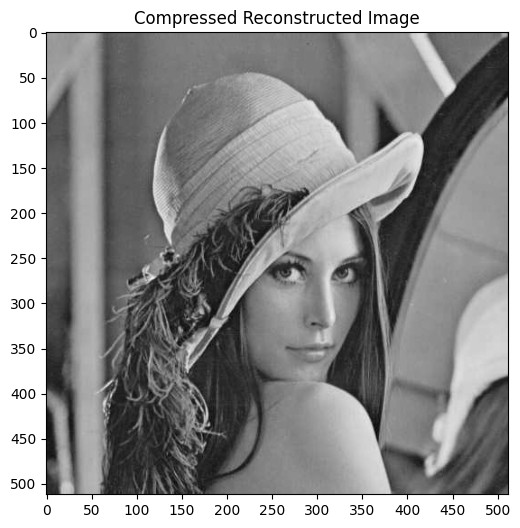

In [12]:
# Compression with 8x8 blocks, truncating lower diagonal DCT coefficients
block_size = 8
rows, cols = img.shape
blocks = [img[i:i+block_size, j:j+block_size] for i in range(0, rows, block_size)
          for j in range(0, cols, block_size)]

# Reconstructing the image after truncation
compressed_blocks = []
for block in blocks:
    block_float = np.float32(block) / 255.0  # Convert to float and scale
    dct_block = cv2.dct(block_float)

    # Truncate the lower diagonal coefficients (last 6 elements)
    dct_block[-3:, -3:] = 0  # Truncate coefficients
    idct_block = cv2.idct(dct_block)

    # Collect the reconstructed block
    compressed_blocks.append(idct_block * 255.0)  # Rescale to 0-255

# Reconstruct the full image from the blocks
compressed_image = np.zeros_like(img, dtype=np.float32)
idx = 0
for i in range(0, rows, block_size):
    for j in range(0, cols, block_size):
        compressed_image[i:i+block_size, j:j+block_size] = compressed_blocks[idx]
        idx += 1

# Rescale to 0-255 and display compressed reconstructed image with axis measurements
compressed_image = np.clip(compressed_image, 0, 255)
plt.figure(figsize=(6, 6))
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Reconstructed Image')
plt.axis('on')  # Turn on the axis
plt.xticks(np.arange(0, compressed_image.shape[1], 50))  # Set x-axis ticks every 50 pixels
plt.yticks(np.arange(0, compressed_image.shape[0], 50))  # Set y-axis ticks every 50 pixels
plt.show()


## **STEP 7: CALCULATE MSE FOR COMPRESSED IMAGE**

In [7]:
# Compute MSE for the compressed image
error_compressed = img - compressed_image
SE_compressed = error_compressed ** 2
MSE_compressed = np.sum(SE_compressed) / (img.shape[0] * img.shape[1])

print(f"MSE for Compressed Image: {MSE_compressed}")


MSE for Compressed Image: 0.010035709477961063


## **STEP 8: PRINT IMAGE SHAPE AND NUMBER OF PIXELS**

In [8]:
# Print image shape and number of pixels
a = img.shape
print(f"Image Shape: {a}")
Num = a[0] * a[1]
print(f"Number of Pixels: {Num}")


Image Shape: (512, 512)
Number of Pixels: 262144
